Build a random forest classifier to predict the risk of heart disease based on a dataset of patient
information. The dataset contains 303 instances with 14 features, including age, sex, chest pain type,
resting blood pressure, serum cholesterol, and maximum heart rate achieved.

Dataset link: https://drive.google.com/file/d/1bGoIE4Z2kG5nyh-fGZAJ7LH0ki3UfmSJ/view?
usp=share_link

Q1. Preprocess the dataset by handling missing values, encoding categorical variables, and scaling the numerical features if necessary
--

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('dataset.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [26]:
X=df.iloc[:,:13]

In [28]:
y=df.target

Q2. Split the dataset into a training set (70%) and a test set (30%).
--

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=10)

3. Train a random forest classifier on the training set using 100 trees and a maximum depth of 10 for each tree. Use the default values for other hyperparameters
--

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
Classifier=RandomForestClassifier(n_estimators=100,max_depth=10)

In [35]:
Classifier.fit(X_train,y_train)

RandomForestClassifier(max_depth=10)

In [36]:
y_pred=Classifier.predict(X_test)

Q4. Evaluate the performance of the model on the test set using accuracy, precision, recall, and F1 score
--

In [39]:
from sklearn.metrics import accuracy_score, precision_score,f1_score, recall_score

In [40]:
print(accuracy_score(y_test,y_pred))

0.7802197802197802


In [43]:
print(precision_score(y_test,y_pred))

0.7058823529411765


In [46]:
print(f1_score(y_test,y_pred))

0.782608695652174


In [47]:
print(recall_score(y_test,y_pred))

0.8780487804878049


Q5. Use the feature importance scores to identify the top 5 most important features in predicting heart disease risk. Visualise the feature importances using a bar chart.
--

In [49]:
importances = Classifier.feature_importances_
for feature, importances in zip(X_train, importances):    
    print(feature, importances)

age 0.09033875903456391
sex 0.03968044140437176
cp 0.13090821526859014
trestbps 0.0774899194273262
chol 0.07375105932540076
fbs 0.010745553388310371
restecg 0.02086957789137056
thalach 0.14032057352070204
exang 0.06628725524186407
oldpeak 0.10995314358015713
slope 0.04292398645109444
ca 0.13450121722564565
thal 0.06223029824060296


In [62]:
print("5 most important features are  |1.thalach,| 2.sex,| 3.ca, |4.oldpeak |5.age ")

5 most important features are  |1.thalach,| 2.sex,| 3.ca, |4.oldpeak |5.age 


In [50]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

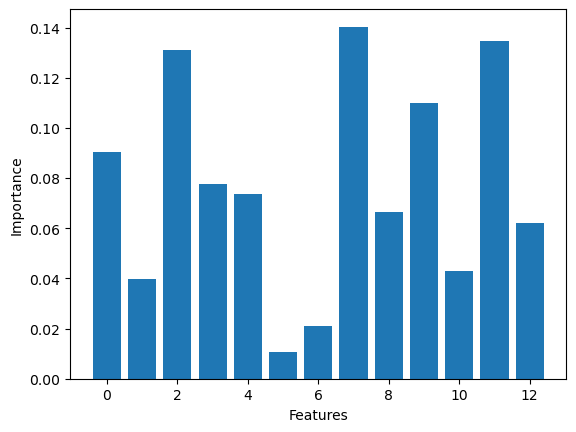

In [59]:
plt.bar(range(X_train.shape[1]), Classifier.feature_importances_)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show

Q6. Tune the hyperparameters of the random forest classifier using grid search or random search. Try different values of the number of trees, maximum depth, minimum samples split, and minimum samples leaf. Use 5-fold cross-validation to evaluate the performance of each set of hyperparameters
---

In [65]:
params={'max_depth':[3,5,10,None],
              'n_estimators':[100,200,300],
               'criterion':['gini','entropy'],
        'min_samples_split':[2,3,4],
        'min_samples_leaf':[1,2,4,5]
              }


In [64]:
from sklearn.model_selection import GridSearchCV

In [66]:
cv=GridSearchCV(Classifier,param_grid=params,cv=5)

In [67]:
cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=10),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [1, 2, 4, 5],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [100, 200, 300]})

In [68]:
cv.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 4,
 'min_samples_split': 3,
 'n_estimators': 300}

In [69]:
y_pred1=cv.predict(X_test)

Q7. Report the best set of hyperparameters found by the search and the corresponding performance metrics. Compare the performance of the tuned model with the default model.
--

In [70]:
print(accuracy_score(y_test,y_pred1))

0.8021978021978022


In [71]:
print(precision_score(y_test,y_pred1))

0.7169811320754716


In [72]:
print(f1_score(y_test,y_pred1))

0.8085106382978724


In [73]:
print(recall_score(y_test,y_pred1))

0.926829268292683


In [91]:
print('GridSearchCV gives more accuracy than default model')

GridSearchCV gives more accuracy than default model
